# Week 4     HW

The purpose of this assignment is to use the Metropolis algorithm to infer model parameters by sampling a _posterior distribution_.  Let's return to our linear regression problem.

Using the synthetic $x-y$ data set from [Hogg, Bovy, and Lang (2010)](https://arxiv.org/abs/1008.4686) (in the `data` directory of this repo), assume a **uniform prior** over slope and y-intercept and use the Metropolis algorithm to draw samples from the posterior density function describing our knowledge of the slope and y-intercept given the observed data.

To do this you will have to extend our 1-D Markov chains from class to 2-D, meaning we have a 2-D parameter space to explore and you will have to decide a method (or methods) to propose moves in those two dimensions.

Show the quality of the fit to the data and the associated uncertainty by plotting the lines corresponding to several samples from your chain on top of the data

Make one or several figures showing your estimate of the 2-D posterior distribution.  Are there correlations between the model parameters?

## Graduate Students

Use the same technique for constraining a linear model connecting the color and brightness of nearby main sequence stars observed by Gaia (parallax > 40 mas).  To do this you will need to:

1. Select only the stars from the data set with parallax > 40 mas.
2. (crudely) remove the white dwarfs (constructing a dividing line by eye is fine for this).
3. Define your likelihood.  This will be similar to the last linear regression likelihood, except that we don't have uncertainties on measurements of the brightness, Mg.  Even if we did, the scatter about the linear relationship is due to physics not measurement uncertainty, so we'll need to infer it from the data.
4. Define priors.  Uniform priors on slope and y-intercept are fine, but you'll need to impose a prior on the scatter in $M_G$ about the line, $\sigma_{M_G}$, that ensures it stays positive and doesn't run away.  I suggest a normal distribution with $\sigma \sim 5$ for $\sigma_{M_G} > 0$.
5. Perform your first 3-D MCMC.

Show the quality of the fit to the data and the associated uncertainty by plotting the lines corresponding to several samples from your chain on top of the data.

Are there correlations between the constraints on the model parameters?

What did we infer regarding the scatter about the line, $\sigma_{M_G}$, and how does it compare to your by-eye assessment of the width of the scatter along the main sequence?

In [11]:
import numpy as np
from scipy.stats.distributions import norm
import matplotlib.pyplot as plt

In [2]:
data=np.array([[0,1,201  ,592       ,61],
      [1,2,244  ,401       ,25],
      [2,3,47  ,583       ,38],
      [3,4,287  ,402       ,15],
      [4,5,203  ,495       ,21],
      [5,6,58  ,173       ,15],
      [6,7,210  ,479       ,27],
      [7,8,202  ,504       ,14],
      [8,9,198  ,510       ,30],
      [9 ,10,158  ,416       ,16],
      [10,11,165  ,393       ,14],
      [11,12,201  ,442       ,25],
      [12,13,157  ,317       ,52],
      [13,14,131  ,311       ,16],
      [14,15,166  ,400       ,34],
      [15,16,160  ,337       ,31],
      [16,17,186  ,423       ,42],
      [17,18,125  ,334       ,26],
      [18,19,218  ,533       ,16],
      [19,20,146  ,344       ,22]])
data

array([[  0,   1, 201, 592,  61],
       [  1,   2, 244, 401,  25],
       [  2,   3,  47, 583,  38],
       [  3,   4, 287, 402,  15],
       [  4,   5, 203, 495,  21],
       [  5,   6,  58, 173,  15],
       [  6,   7, 210, 479,  27],
       [  7,   8, 202, 504,  14],
       [  8,   9, 198, 510,  30],
       [  9,  10, 158, 416,  16],
       [ 10,  11, 165, 393,  14],
       [ 11,  12, 201, 442,  25],
       [ 12,  13, 157, 317,  52],
       [ 13,  14, 131, 311,  16],
       [ 14,  15, 166, 400,  34],
       [ 15,  16, 160, 337,  31],
       [ 16,  17, 186, 423,  42],
       [ 17,  18, 125, 334,  26],
       [ 18,  19, 218, 533,  16],
       [ 19,  20, 146, 344,  22]])

In [71]:
def build_model(m, b):
    def model(x):
        return m * x + b
    return model

def likelihood(m, b, x=data[:,1], y=data[:,2], sigma_y=data[:,3]):
    model = build_model(m, b)
    lnlike = -.5*np.sum(np.log(2*np.pi*sigma_y**2)) - np.sum((y - model(x))**2/(2*sigma_y**2)) 
    return np.exp(lnlike)

[]
[]
4162


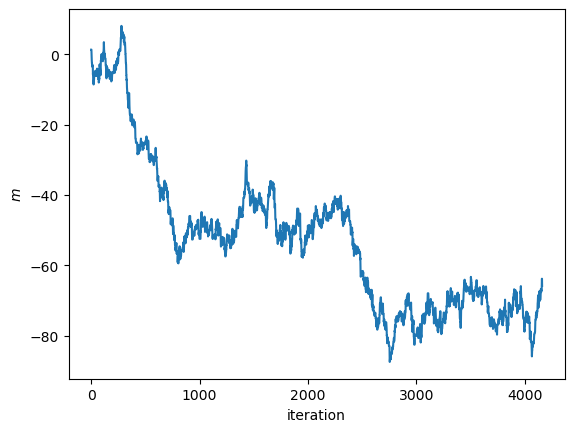

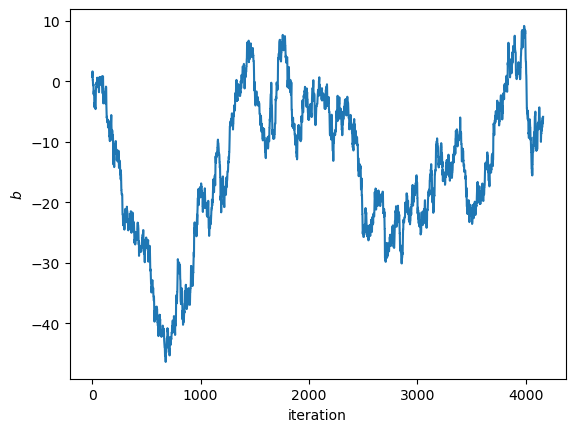

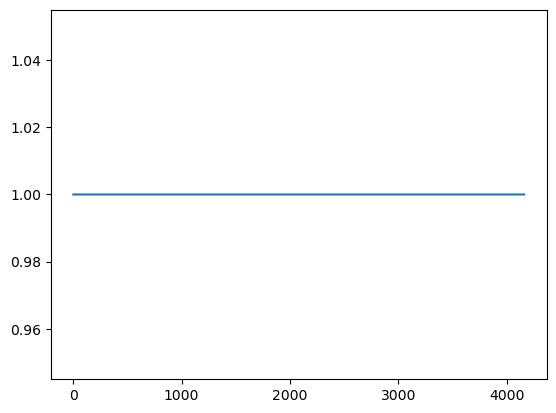

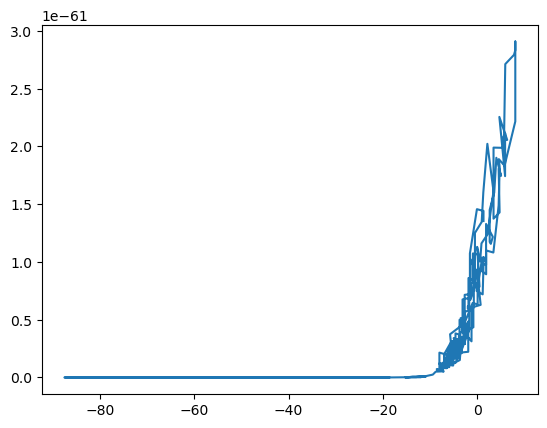

In [73]:
m0=1
b0=1

m=m0
b=b0

build_model(m,b)

p_current = likelihood(m,b)


chainm=[]
chainb=[]
probs = []

niter = 10000
sigma_jump = 1.
counter=1
print(chainm)
print(chainb)

for i in range(niter):
    u = np.random.uniform()
    if u<.5:
        mp = norm.rvs(loc=m, scale=sigma_jump)
    if u>.5:
        bp =norm.rvs(loc=b, scale=sigma_jump)
    
    p_p = likelihood(m,b)
    
    α = p_p/p_current
    u = np.random.uniform()
    accepted = u < α
    
    if accepted:
        #print(counter)
        counter+=1
        m=mp
        b=bp
        p_current = p_p
        chainm.append(m)
        chainb.append(b)
        probs.append(p_current)
print(counter)


plt.plot(chainm)
plt.xlabel('iteration')
plt.ylabel('$m$')
plt.show()
plt.plot(chainb)
plt.xlabel('iteration')
plt.ylabel('$b$')
plt.show()
plt.plot(np.exp(probs))
plt.show()
plt.plot(chainm,probs)

In [38]:
print(np.shape(chainm))
print(np.shape(chainb))

(9983, 20)
(9983, 20)


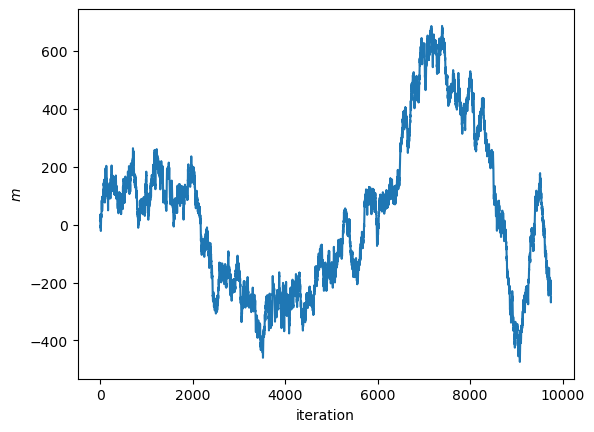

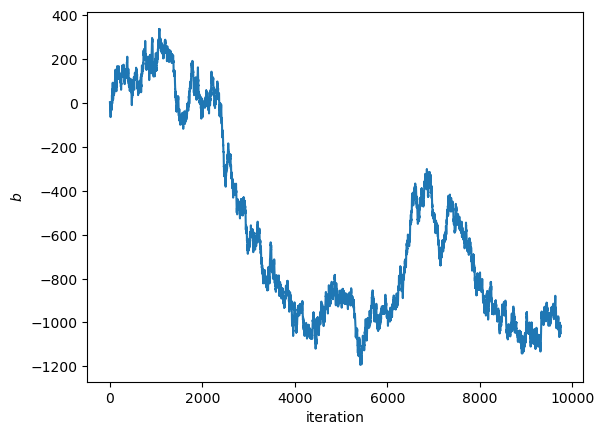

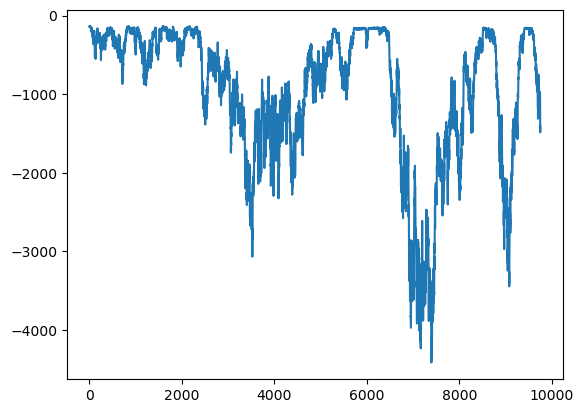

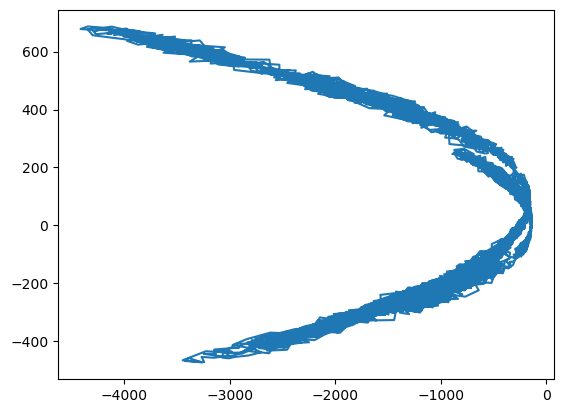

In [59]:
burnin_length = 2000

plt.plot(chainm)
plt.xlabel('iteration')
plt.ylabel('$m$')
plt.show()
plt.plot(chainb)
plt.xlabel('iteration')
plt.ylabel('$b$')
plt.show()
plt.plot(probs)
plt.show()
plt.plot(probs,chainm)